In [1834]:
import numpy as np
import pandas as pd

### 1. Read and clean the first dataset

In [1835]:
uni1 = pd.read_csv("/Users/inesavellosolis/Documents/GitHub Personal/thebridge_ft_sep22/2-Data Analysis/entregables/src/data/qs-world-university-rankings-2017-to-2022-V2.csv")
uni1.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [1836]:
# Keeping data from 2022
uni1.year.unique()
uni1 = uni1[uni1.year == 2022]
uni1.shape

# No need for that year column anymore
uni1.drop(columns=["year", "rank_display"], inplace=True)

#Checking content
uni1.columns
uni1.head()

,university,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
5182,Massachusetts Institute of Technology (MIT),100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
5183,University of Oxford,99.5,https://www.topuniversities.com/universities/u...,United Kingdom,Oxford,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,3.0,"8,442",L,"6,708"
5184,Stanford University,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
5185,University of Cambridge,98.7,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
5186,Harvard University,98.0,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"


In [1837]:
uni1[uni1.isnull()]
uni1 = uni1.dropna()
uni1.shape

(487, 13)

### 2. Read and clean the second dataset

In [1838]:
lifeq = pd.read_csv("/Users/inesavellosolis/Documents/GitHub Personal/thebridge_ft_sep22/2-Data Analysis/entregables/src/data/QualityOfLife - Hoja 1.csv")
lifeq.head()

,Rank,Country,Stability,Rights,Health,Safety,Climate,Costs,Popularity,Total
0,1,Australia,87,94,87,100,90,23,41,76
1,2,Hong Kong *,79,82,100,97,49,61,52,75
2,3,San Marino,83,82,91,87,62,61,46,74
3,4,Switzerland,91,99,93,99,34,44,40,73
4,5,Macao *,89,69,100,93,48,61,50,73


In [1839]:
lifeq.drop(columns= ["Total", "Rank"], inplace=True)
lifeq.columns

Index(['Country', 'Stability', 'Rights', 'Health', 'Safety', 'Climate',
       'Costs', 'Popularity'],
      dtype='object')

In [1840]:
lifeq.shape
lifeq = lifeq.dropna()
lifeq.shape

(137, 8)

### 3. Check columns that will be merged

In [1841]:
print(sorted(uni1.country.unique()))
print(sorted(lifeq.Country.unique()))

['Argentina', 'Australia', 'Austria', 'Belarus', 'Belgium', 'Brazil', 'Brunei', 'Canada', 'Chile', 'China (Mainland)', 'Colombia', 'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong SAR', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Lebanon', 'Lithuania', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay']
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Bermuda *', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burma', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Chad', 

In [1842]:
uni1['country'].isin(lifeq['Country']).value_counts()

True     441
False     46
Name: country, dtype: int64

In [1843]:
"""uni = pd.merge(uni1, lifeq, how='left', left_on='country', right_on = 'Country')


print(uni.country[uni.Country.isnull()].shape)
incorrect_countries = uni.country[uni.Country.isnull()]

incorrect_countries.unique()"""

"uni = pd.merge(uni1, lifeq, how='left', left_on='country', right_on = 'Country')\n\n\nprint(uni.country[uni.Country.isnull()].shape)\nincorrect_countries = uni.country[uni.Country.isnull()]\n\nincorrect_countries.unique()"

In [1844]:
uni1['country'] = uni1['country'].str.replace('China (Mainland)', 'China', regex=False)
uni1['country'] = uni1['country'].str.replace('Hong Kong SAR', 'Hong Kong *', regex=False)
uni1['country'] = uni1['country'].str.replace('Czech Republic', 'Czechia', regex=False)
uni1['country'] = uni1['country'].str.replace('Iran, Islamic Republic of', 'Iran', regex=False)


In [1845]:
uni = pd.merge(uni1, lifeq, how='left', left_on='country', right_on = 'Country')

#print(uni.loc[:, "Country":"Popularity"][uni.Costs.isnull()])
print(uni.country[uni.Country.isnull()].shape)
incorrect_countries = uni.country[uni.Country.isnull()]

incorrect_countries.unique()

(10,)


array(['Taiwan', 'Brunei'], dtype=object)

In [1846]:
uni = uni[uni['country'] != 'Taiwan']
uni = uni[uni['country'] != 'Brunei']
uni.shape


(477, 21)

In [1847]:
#for elem in uni.columns:
    #print(uni[uni[elem].isnull()])


In [1848]:
"""print(uni.columns)
uni = uni.drop(columns = 'Country')
uni.set_index('university', inplace = True)
uni.head()"""

"print(uni.columns)\nuni = uni.drop(columns = 'Country')\nuni.set_index('university', inplace = True)\nuni.head()"

### 3. Read and clean the third dataset

In [1849]:
tourism = pd.read_csv("/Users/inesavellosolis/Documents/GitHub Personal/thebridge_ft_sep22/2-Data Analysis/entregables/src/data/Countries_usefulFeatures.csv")
tourism.head()

,Country_Region,Population_Size,Tourism,Date_FirstFatality,Date_FirstConfirmedCase,Latitude,Longtitude,Mean_Age,Lockdown_Date,Lockdown_Type,Country_Code
0,Afghanistan,37172386,14000,2020-03-23,2020-02-25,33.939110,67.709953,17.3,2020-03-24,Full,AFG
1,Albania,2866376,5340000,2020-03-12,2020-03-10,41.153332,20.168331,36.2,2020-03-08,Full,ALB
2,Algeria,42228429,2657000,2020-03-13,2020-02-26,28.033886,1.659626,27.5,2020-03-24,Full,DZA
3,Andorra,77006,3042000,2020-03-23,2020-03-03,42.546245,1.601554,37.0,2020-03-16,Full,AND
4,Angola,30809762,218000,2020-03-30,2020-03-21,-11.202692,17.873887,16.4,NaN,NaN,AGO


In [1850]:
tourism.shape
tourism = tourism.dropna()
tourism.shape


(127, 11)

In [1851]:
tourism = tourism.drop(columns= ['Date_FirstFatality',
       'Date_FirstConfirmedCase', 'Latitude', 'Longtitude', 'Mean_Age',
       'Lockdown_Date', 'Lockdown_Type', 'Country_Code'])

tourism.columns


Index(['Country_Region', 'Population_Size', 'Tourism'], dtype='object')

In [1852]:
print(sorted(uni1.country.unique()))
print(sorted(tourism.Country_Region.unique()))
uni1['country'].isin(tourism['Country_Region']).value_counts()

['Argentina', 'Australia', 'Austria', 'Belarus', 'Belgium', 'Brazil', 'Brunei', 'Canada', 'Chile', 'China', 'Colombia', 'Cyprus', 'Czechia', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong *', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Lebanon', 'Lithuania', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay']
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Canada', 'Chile', 'China', 'Colombia', 'Congo (Brazza

True     362
False    125
Name: country, dtype: int64

In [1853]:
"""uni = pd.merge(uni, tourism, how='left', left_on='country', right_on = 'Country_Region')
print(uni.country[uni.Country_Region.isnull()].shape)
incorrect_countries2 = uni.country[uni.Country_Region.isnull()]

incorrect_countries2.unique()"""

"uni = pd.merge(uni, tourism, how='left', left_on='country', right_on = 'Country_Region')\nprint(uni.country[uni.Country_Region.isnull()].shape)\nincorrect_countries2 = uni.country[uni.Country_Region.isnull()]\n\nincorrect_countries2.unique()"

In [1854]:
uni.country

0       United States
1      United Kingdom
2       United States
3      United Kingdom
4       United States
            ...      
482       South Korea
483     United States
484       South Korea
485             Italy
486            Canada
Name: country, Length: 477, dtype: object

In [1855]:
uni['country'] = uni['country'].str.replace('United States', 'US', regex=False)
uni['country'] = uni['country'].str.replace('South Korea', 'Korea, South', regex=False)
uni['country'] = uni['country'].str.replace('Sweden', 'Sweden', regex=False)

In [1856]:
uni = pd.merge(uni, tourism, how='left', left_on='country', right_on = 'Country_Region')
print(uni.country[uni.Country_Region.isnull()].shape)
incorrect_countries2 = uni.country[uni.Country_Region.isnull()]

incorrect_countries2.unique()

(28,)


array(['Hong Kong *', 'Korea, South', 'Sweden'], dtype=object)

In [1857]:
uni.set_index("country", inplace=True)
uni.loc['Korea, South', 'Population_Size'] = 51606633
uni.loc['Korea, South', 'Tourism'] = 15347000

uni.loc['Sweden', 'Population_Size'] = 10175214
uni.loc['Sweden', 'Tourism'] = 7440000

uni.loc['Hong Kong *', 'Population_Size'] = 7482000
uni.loc['Hong Kong *', 'Tourism'] = 3569000

uni.loc[['Korea, South','Sweden','Hong Kong *'], ['Population_Size','Tourism']]

,Population_Size,Tourism
country,,
"Korea, South",51606633.0,15347000.0
"Korea, South",51606633.0,15347000.0
"Korea, South",51606633.0,15347000.0
"Korea, South",51606633.0,15347000.0
"Korea, South",51606633.0,15347000.0
"Korea, South",51606633.0,15347000.0
"Korea, South",51606633.0,15347000.0
"Korea, South",51606633.0,15347000.0
"Korea, South",51606633.0,15347000.0


In [1858]:
uni.reset_index(inplace = True)
print(uni.country[uni.Population_Size.isnull()].shape)
incorrect_countries3 = uni.country[uni.Population_Size.isnull()]

incorrect_countries3.unique()

(0,)


array([], dtype=object)

In [1859]:
uni = uni.drop(columns= ["Country_Region", "Country"] )
uni.columns

Index(['country', 'university', 'score', 'link', 'city', 'region', 'logo',
       'type', 'research_output', 'student_faculty_ratio',
       'international_students', 'size', 'faculty_count', 'Stability',
       'Rights', 'Health', 'Safety', 'Climate', 'Costs', 'Popularity',
       'Population_Size', 'Tourism'],
      dtype='object')

In [1860]:
print(uni.shape)
uni= uni.dropna()
uni.shape

(477, 22)


(477, 22)

### 3. Create new indexes

In [1861]:
#Rename columns
uni = uni.rename(columns = {'country':'Country', 'university':'University', 'score':'Score', 'link':'Link', 'city':'City', 'region':'Region', 'logo':'Logo',
       'type':'Uni_Type', 'research_output':'Research_Output', 'student_faculty_ratio':'Student_Faculty_Ratio',
       'international_students': 'International_Students', 'size':'Size', 'faculty_count':'Faculty_Count', 'Stability':'Stability_Index' ,
       'Rights':'Rights_Index' , 'Health':'Health_Index', 'Safety':'Safety_Index', 'Climate':'Climate_Index', 'Costs':'Costs_Index', 'Popularity':'Popularity_Index'})
uni.columns

Index(['Country', 'University', 'Score', 'Link', 'City', 'Region', 'Logo',
       'Uni_Type', 'Research_Output', 'Student_Faculty_Ratio',
       'International_Students', 'Size', 'Faculty_Count', 'Stability_Index',
       'Rights_Index', 'Health_Index', 'Safety_Index', 'Climate_Index',
       'Costs_Index', 'Popularity_Index', 'Population_Size', 'Tourism'],
      dtype='object')

In [1863]:
#Calculate International Students Index
uni['International_Students'] = uni['International_Students'].str.replace(',', '', regex=False)
uni['International_Students'] = uni['International_Students'].apply(lambda x: float(x))

print(uni['International_Students'].max())
print(uni['International_Students'].min())

uni['International_Students_Index'] = uni['International_Students'].apply(lambda x: x*100/uni['International_Students'].max())
uni['International_Students_Index'].max()



31049.0
1.077


100.0

In [1864]:
#Calculate Research Output Index
print(uni.Research_Output.unique())
uni['Research_Output'] = uni['Research_Output'].str.replace('Very high', 'Very High', regex=False)
print(uni.Research_Output.unique())

def research_index(x):
    if x == 'Low':
        y = 25
    elif x == 'Medium':
        y = 50
    elif x == 'High':
        y = 75
    elif x == 'Very High':
        y = 100
    else:
        y = None
    return y

uni['Research_Output_Index'] = uni['Research_Output'].apply(research_index)
uni['Research_Output_Index'].unique()

['Very High' 'Very high' 'High' 'Medium' 'Low']
['Very High' 'High' 'Medium' 'Low']


array([100,  75,  50,  25])

In [1865]:
#Calculate Student-faculty Index
print(uni.Student_Faculty_Ratio.min())
print(uni.Student_Faculty_Ratio.max())

uni['Student_Faculty_Index'] = uni['Student_Faculty_Ratio'].apply(lambda x:  100 * (44 - x) / (44-2))

print(uni['Student_Faculty_Index'].unique())


2.0
44.0
[ 95.23809524  97.61904762  92.85714286 100.          88.0952381
  90.47619048  85.71428571  83.33333333  78.57142857  59.52380952
  73.80952381  80.95238095  71.42857143  76.19047619  69.04761905
  64.28571429  61.9047619   45.23809524  66.66666667  54.76190476
  47.61904762  52.38095238  50.          57.14285714  28.57142857
  35.71428571  42.85714286  26.19047619  21.42857143  40.47619048
   4.76190476   0.        ]


In [1866]:
#Calculate Size Index
print(uni['Size'].unique())

def size_index(x):
    if x == 'S':
        y = 25
    elif x == 'M':
        y = 50
    elif x == 'L':
        y = 75
    elif x == 'XL':
        y = 100
    else:
        y = None
    return y

uni['Size_Index'] = uni['Size'].apply(size_index)
uni['Size_Index'].unique()

['M' 'L' 'S' 'XL']


array([ 50,  75,  25, 100])

In [1867]:
# Now we can calculate the Quality of University Index

Int_Stu_w = 0.3
Research_w = 0.2
Stu_fac_w = 0.3
Size_w = 0.2

uni['University_Quality_Index'] = uni.apply(lambda x: x['International_Students_Index']*Int_Stu_w + x['Research_Output_Index']*Research_w + x['Student_Faculty_Index']*Stu_fac_w + x['Size_Index']*Size_w, axis=1)


In [1868]:
# Let's also calculate the Quality of life Index for each country

Stability_w = 0.15
Rights_w = 0.1
Health_w = 0.15
Safety_w = 0.15
Climate_w = 0.15
Costs_w = 0.15
Popularity_w = 0.15

#print(Stability_w+ Rights_w+ Health_w+ Safety_w+ Climate_w+ Costs_w + Popularity_w)

uni['Life_Quality_Index'] = uni.apply(lambda x: x.Stability_Index*Stability_w + x.Rights_Index*Rights_w + x.Health_Index*Health_w + x.Safety_Index*Safety_w + x.Climate_Index*Climate_w + x.Costs_Index*Costs_w + x.Popularity_Index*Popularity_w, axis=1)

In [1869]:
uni.columns

Index(['Country', 'University', 'Score', 'Link', 'City', 'Region', 'Logo',
       'Uni_Type', 'Research_Output', 'Student_Faculty_Ratio',
       'International_Students', 'Size', 'Faculty_Count', 'Stability_Index',
       'Rights_Index', 'Health_Index', 'Safety_Index', 'Climate_Index',
       'Costs_Index', 'Popularity_Index', 'Population_Size', 'Tourism',
       'International_Students_Index', 'Research_Output_Index',
       'Student_Faculty_Index', 'Size_Index', 'University_Quality_Index',
       'Life_Quality_Index'],
      dtype='object')

In [1870]:
#Create rank column based on total index results

Uni_q_w = 0.4
Life_q_w = 0.6

uni['Total_Index'] = uni.apply(lambda x: x['University_Quality_Index']*Uni_q_w + x['Life_Quality_Index']*Life_q_w, axis=1 )

uni['Rank'] = uni['Total_Index'].rank(method='max', ascending=False)

#uni.loc[:, ['Rank']].sort_values(by='Rank', inplace = True)

In [1871]:
uni.sort_values(by='Rank', inplace = True)
uni.head()

,Country,University,Score,Link,City,Region,Logo,Uni_Type,Research_Output,Student_Faculty_Ratio,...,Population_Size,Tourism,International_Students_Index,Research_Output_Index,Student_Faculty_Index,Size_Index,University_Quality_Index,Life_Quality_Index,Total_Index,Rank
57,Australia,Monash University,72.2,https://www.topuniversities.com/universities/m...,Melbourne,Oceania,https://www.topuniversities.com/sites/default/...,Public,Very High,15.0,...,24982688.0,9246000.0,100.000000,100,69.047619,100,90.714286,73.6,80.445714,1.0
37,Australia,The University of Sydney,80.4,https://www.topuniversities.com/universities/u...,Sydney,Oceania,https://www.topuniversities.com/sites/default/...,Public,Very High,13.0,...,24982688.0,9246000.0,83.545364,100,73.809524,100,87.206466,73.6,79.042587,2.0
45,Australia,The University of Queensland,76.6,https://www.topuniversities.com/universities/u...,Brisbane City,Oceania,https://www.topuniversities.com/sites/default/...,Public,Very High,12.0,...,24982688.0,9246000.0,71.631937,100,76.190476,100,84.346724,73.6,77.898690,3.0
42,Australia,The University of New South Wales (UNSW Sydney),77.7,https://www.topuniversities.com/universities/u...,Sydney,Oceania,https://www.topuniversities.com/sites/default/...,Public,Very High,14.0,...,24982688.0,9246000.0,69.577120,100,71.428571,100,82.301707,73.6,77.080683,4.0
25,Canada,University of Toronto,85.3,https://www.topuniversities.com/universities/u...,Toronto,North America,https://www.topuniversities.com/sites/default/...,Public,Very High,8.0,...,37057765.0,21134000.0,88.685626,100,85.714286,100,92.319973,65.4,76.167989,5.0


### 4. Calculating distance to get home 

In [1872]:
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy
import numpy 
import pandas as pd 
from vega_datasets import data as vds

In [1873]:
import geopy.distance

def get_distance(start_address):
    
    # string addresses to location information
    start_location = geocoder.osm(start_address)
    stop_location = geocoder.osm('Madrid')
    
    # pull out latitude and longitude from location information
    start_latlng = [start_location.lat, start_location.lng]
    stop_latlng = [stop_location.lat, stop_location.lng]
    
    # calculate distance from start point to stop point using latitudes and longitudes
    distance = geopy.distance.distance(start_latlng, stop_latlng).miles
    
    print(f'distance: {distance:.2f} miles')
    
    return distance


uni['Distance_Home'] = uni['University'].apply(get_distance)


distance: 10768.27 miles
distance: 10990.31 miles
distance: 10840.94 miles
distance: 10993.32 miles
distance: 3760.64 miles
distance: 3592.22 miles
distance: 10757.29 miles
distance: 6559.51 miles
distance: 6226.92 miles
distance: 7076.62 miles
distance: 2790.90 miles
distance: 5247.56 miles
distance: 7077.11 miles
distance: 6560.19 miles
distance: 785.75 miles
distance: 1126.72 miles
distance: 6555.54 miles
distance: 2790.90 miles
distance: 9278.26 miles
distance: 3578.06 miles
distance: 314.32 miles
distance: 10839.02 miles
distance: 3587.91 miles
distance: 10766.05 miles
distance: 3998.45 miles
distance: 5847.63 miles
distance: 10845.52 miles
distance: 10982.90 miles
distance: 5833.94 miles
distance: 3620.37 miles
distance: 2790.90 miles
distance: 2790.90 miles
distance: 10761.98 miles
distance: 5741.95 miles
distance: 10990.71 miles
distance: 312.94 miles
distance: 6552.74 miles
distance: 4041.26 miles
distance: 6557.95 miles
distance: 653.09 miles
distance: 4228.06 miles
distance:

In [1874]:
uni['Distance_Home']

57     10768.274732
37     10990.305389
45     10840.935553
42     10993.318967
25      3760.639157
           ...     
362     2790.897900
364     2971.311196
230     6628.577570
391     4982.920191
443     2974.295157
Name: Distance_Home, Length: 477, dtype: float64

In [1875]:
uni.reset_index(inplace=True)
uni = uni.round()

In [1876]:
uni.to_excel('Uni_Final.xlsx')

### 5. Getting to know my data

In [1877]:
uni.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         477 non-null    int64  
 1   Country                       477 non-null    object 
 2   University                    477 non-null    object 
 3   Score                         477 non-null    float64
 4   Link                          477 non-null    object 
 5   City                          477 non-null    object 
 6   Region                        477 non-null    object 
 7   Logo                          477 non-null    object 
 8   Uni_Type                      477 non-null    object 
 9   Research_Output               477 non-null    object 
 10  Student_Faculty_Ratio         477 non-null    float64
 11  International_Students        477 non-null    float64
 12  Size                          477 non-null    object 
 13  Facul

In [1878]:
uni.shape

(477, 32)

In [1879]:
uni.head(5)

,index,Country,University,Score,Link,City,Region,Logo,Uni_Type,Research_Output,...,Tourism,International_Students_Index,Research_Output_Index,Student_Faculty_Index,Size_Index,University_Quality_Index,Life_Quality_Index,Total_Index,Rank,Distance_Home
0,57,Australia,Monash University,72.0,https://www.topuniversities.com/universities/m...,Melbourne,Oceania,https://www.topuniversities.com/sites/default/...,Public,Very High,...,9246000.0,100.0,100,69.0,100,91.0,74.0,80.0,1.0,10768.0
1,37,Australia,The University of Sydney,80.0,https://www.topuniversities.com/universities/u...,Sydney,Oceania,https://www.topuniversities.com/sites/default/...,Public,Very High,...,9246000.0,84.0,100,74.0,100,87.0,74.0,79.0,2.0,10990.0
2,45,Australia,The University of Queensland,77.0,https://www.topuniversities.com/universities/u...,Brisbane City,Oceania,https://www.topuniversities.com/sites/default/...,Public,Very High,...,9246000.0,72.0,100,76.0,100,84.0,74.0,78.0,3.0,10841.0
3,42,Australia,The University of New South Wales (UNSW Sydney),78.0,https://www.topuniversities.com/universities/u...,Sydney,Oceania,https://www.topuniversities.com/sites/default/...,Public,Very High,...,9246000.0,70.0,100,71.0,100,82.0,74.0,77.0,4.0,10993.0
4,25,Canada,University of Toronto,85.0,https://www.topuniversities.com/universities/u...,Toronto,North America,https://www.topuniversities.com/sites/default/...,Public,Very High,...,21134000.0,89.0,100,86.0,100,92.0,65.0,76.0,5.0,3761.0


In [1880]:
uni.dtypes

index                             int64
Country                          object
University                       object
Score                           float64
Link                             object
City                             object
Region                           object
Logo                             object
Uni_Type                         object
Research_Output                  object
Student_Faculty_Ratio           float64
International_Students          float64
Size                             object
Faculty_Count                    object
Stability_Index                 float64
Rights_Index                    float64
Health_Index                    float64
Safety_Index                    float64
Climate_Index                   float64
Costs_Index                     float64
Popularity_Index                float64
Population_Size                 float64
Tourism                         float64
International_Students_Index    float64
Research_Output_Index             int64


In [1881]:
uni.isna().any()

index                           False
Country                         False
University                      False
Score                           False
Link                            False
City                            False
Region                          False
Logo                            False
Uni_Type                        False
Research_Output                 False
Student_Faculty_Ratio           False
International_Students          False
Size                            False
Faculty_Count                   False
Stability_Index                 False
Rights_Index                    False
Health_Index                    False
Safety_Index                    False
Climate_Index                   False
Costs_Index                     False
Popularity_Index                False
Population_Size                 False
Tourism                         False
International_Students_Index    False
Research_Output_Index           False
Student_Faculty_Index           False
Size_Index  

In [1882]:
uni.nunique()

index                           477
Country                          55
University                      477
Score                            72
Link                            477
City                            366
Region                            6
Logo                            477
Uni_Type                          2
Research_Output                   4
Student_Faculty_Ratio            32
International_Students          356
Size                              4
Faculty_Count                   461
Stability_Index                  36
Rights_Index                     41
Health_Index                     36
Safety_Index                     28
Climate_Index                    40
Costs_Index                      34
Popularity_Index                 27
Population_Size                  55
Tourism                          54
International_Students_Index     51
Research_Output_Index             4
Student_Faculty_Index            32
Size_Index                        4
University_Quality_Index    

In [1883]:
uni.median()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



index                                238.0
Score                                 39.0
Student_Faculty_Ratio                 10.0
International_Students              2513.0
Stability_Index                       76.0
Rights_Index                          82.0
Health_Index                          78.0
Safety_Index                          93.0
Climate_Index                         54.0
Costs_Index                           37.0
Popularity_Index                      44.0
Population_Size                 66460344.0
Tourism                         31192000.0
International_Students_Index           8.0
Research_Output_Index                100.0
Student_Faculty_Index                 81.0
Size_Index                            75.0
University_Quality_Index              62.0
Life_Quality_Index                    65.0
Total_Index                           64.0
Rank                                 239.0
Distance_Home                       3410.0
dtype: float64

In [1884]:
uni.max()

index                                                                         476
Country                                                                   Uruguay
University                                       École Normale Supérieure de Lyon
Score                                                                       100.0
Link                            https://www.topuniversities.com/universities/z...
City                                                                       Zürich
Region                                                                    Oceania
Logo                            https://www.topuniversities.com/sites/default/...
Uni_Type                                                                   Public
Research_Output                                                         Very High
Student_Faculty_Ratio                                                        44.0
International_Students                                                    31049.0
Size            

In [1885]:
uni.min()

index                                                                           0
Country                                                                 Argentina
University                                                   University of Dundee
Score                                                                        24.0
Link                            https://www.topuniversities.com/universities/a...
City                                                                       Aachen
Region                                                                     Africa
Logo                            https://www.topuniversities.com/sites/default/...
Uni_Type                                                                  Private
Research_Output                                                              High
Student_Faculty_Ratio                                                         2.0
International_Students                                                        1.0
Size            

In [1886]:
uni.std()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



index                           1.378423e+02
Score                           1.913149e+01
Student_Faculty_Ratio           5.687733e+00
International_Students          4.453455e+03
Stability_Index                 1.376717e+01
Rights_Index                    2.198479e+01
Health_Index                    1.342656e+01
Safety_Index                    9.895234e+00
Climate_Index                   2.456454e+01
Costs_Index                     9.784648e+00
Popularity_Index                1.425870e+01
Population_Size                 3.431620e+08
Tourism                         2.833748e+07
International_Students_Index    1.437791e+01
Research_Output_Index           8.931852e+00
Student_Faculty_Index           1.351911e+01
Size_Index                      2.026924e+01
University_Quality_Index        7.942240e+00
Life_Quality_Index              6.122327e+00
Total_Index                     5.154162e+00
Rank                            1.378423e+02
Distance_Home                   2.794428e+03
dtype: flo

In [1887]:
uni.var()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



index                           1.900050e+04
Score                           3.660140e+02
Student_Faculty_Ratio           3.235031e+01
International_Students          1.983326e+07
Stability_Index                 1.895349e+02
Rights_Index                    4.833310e+02
Health_Index                    1.802725e+02
Safety_Index                    9.791566e+01
Climate_Index                   6.034165e+02
Costs_Index                     9.573934e+01
Popularity_Index                2.033106e+02
Population_Size                 1.177601e+17
Tourism                         8.030125e+14
International_Students_Index    2.067242e+02
Research_Output_Index           7.977798e+01
Student_Faculty_Index           1.827662e+02
Size_Index                      4.108420e+02
University_Quality_Index        6.307918e+01
Life_Quality_Index              3.748288e+01
Total_Index                     2.656539e+01
Rank                            1.900050e+04
Distance_Home                   7.808826e+06
dtype: flo

In [1888]:
uni.describe().T

,count,mean,std,min,25%,50%,75%,max
index,477.0,2.380000e+02,1.378423e+02,0.0,119.0,238.0,357.0,4.760000e+02
Score,477.0,4.502725e+01,1.913149e+01,24.0,30.0,39.0,56.0,1.000000e+02
Student_Faculty_Ratio,477.0,1.097694e+01,5.687733e+00,2.0,7.0,10.0,13.0,4.400000e+01
International_Students,477.0,3.600698e+03,4.453455e+03,1.0,9.0,2513.0,5536.0,3.104900e+04
Stability_Index,477.0,7.257442e+01,1.376717e+01,13.0,65.0,76.0,84.0,9.100000e+01
Rights_Index,477.0,7.677358e+01,2.198479e+01,13.0,66.0,82.0,93.0,1.000000e+02
Health_Index,477.0,7.802516e+01,1.342656e+01,31.0,71.0,78.0,87.0,1.000000e+02
Safety_Index,477.0,9.006709e+01,9.895234e+00,30.0,86.0,93.0,95.0,1.000000e+02
Climate_Index,477.0,4.623690e+01,2.456454e+01,2.0,21.0,54.0,66.0,9.500000e+01
Costs_Index,477.0,3.965409e+01,9.784648e+00,23.0,34.0,37.0,44.0,7.600000e+01


In [1889]:
uni.loc[:,uni.columns.str.contains('Index')].cov().round()

,Stability_Index,Rights_Index,Health_Index,Safety_Index,Climate_Index,Costs_Index,Popularity_Index,International_Students_Index,Research_Output_Index,Student_Faculty_Index,Size_Index,University_Quality_Index,Life_Quality_Index,Total_Index
Stability_Index,190.0,239.0,127.0,108.0,-128.0,-52.0,-51.0,40.0,22.0,-6.0,0.0,15.0,51.0,38.0
Rights_Index,239.0,483.0,178.0,129.0,-160.0,-109.0,-46.0,79.0,41.0,-25.0,-12.0,21.0,83.0,59.0
Health_Index,127.0,178.0,180.0,76.0,-96.0,-39.0,-41.0,29.0,13.0,-5.0,4.0,11.0,49.0,34.0
Safety_Index,108.0,129.0,76.0,98.0,-75.0,-29.0,-10.0,31.0,16.0,-4.0,-2.0,11.0,37.0,27.0
Climate_Index,-128.0,-160.0,-96.0,-75.0,603.0,-29.0,134.0,-23.0,-10.0,-34.0,11.0,-17.0,49.0,21.0
Costs_Index,-52.0,-109.0,-39.0,-29.0,-29.0,96.0,-26.0,-32.0,-19.0,27.0,-24.0,-10.0,-23.0,-18.0
Popularity_Index,-51.0,-46.0,-41.0,-10.0,134.0,-26.0,203.0,-3.0,32.0,-1.0,58.0,17.0,28.0,23.0
International_Students_Index,40.0,79.0,29.0,31.0,-23.0,-32.0,-3.0,207.0,23.0,8.0,104.0,89.0,14.0,44.0
Research_Output_Index,22.0,41.0,13.0,16.0,-10.0,-19.0,32.0,23.0,80.0,-11.0,18.0,23.0,12.0,16.0
Student_Faculty_Index,-6.0,-25.0,-5.0,-4.0,-34.0,27.0,-1.0,8.0,-11.0,183.0,-67.0,42.0,-6.0,13.0


In [1890]:
uni.loc[:,uni.columns.str.contains('Index')].corr().round(3)

,Stability_Index,Rights_Index,Health_Index,Safety_Index,Climate_Index,Costs_Index,Popularity_Index,International_Students_Index,Research_Output_Index,Student_Faculty_Index,Size_Index,University_Quality_Index,Life_Quality_Index,Total_Index
Stability_Index,1.000,0.789,0.685,0.789,-0.379,-0.389,-0.260,0.202,0.181,-0.030,0.001,0.133,0.610,0.532
Rights_Index,0.789,1.000,0.603,0.593,-0.295,-0.508,-0.148,0.249,0.210,-0.084,-0.027,0.123,0.614,0.521
Health_Index,0.685,0.603,1.000,0.572,-0.290,-0.297,-0.216,0.150,0.110,-0.025,0.016,0.100,0.590,0.488
Safety_Index,0.789,0.593,0.572,1.000,-0.307,-0.301,-0.074,0.217,0.181,-0.029,-0.008,0.136,0.618,0.536
Climate_Index,-0.379,-0.295,-0.290,-0.307,1.000,-0.119,0.384,-0.066,-0.047,-0.102,0.021,-0.085,0.327,0.165
Costs_Index,-0.389,-0.508,-0.297,-0.301,-0.119,1.000,-0.189,-0.230,-0.222,0.206,-0.122,-0.130,-0.381,-0.354
Popularity_Index,-0.260,-0.148,-0.216,-0.074,0.384,-0.189,1.000,-0.014,0.251,-0.004,0.199,0.148,0.319,0.311
International_Students_Index,0.202,0.249,0.150,0.217,-0.066,-0.230,-0.014,1.000,0.177,0.039,0.357,0.782,0.159,0.600
Research_Output_Index,0.181,0.210,0.110,0.181,-0.047,-0.222,0.251,0.177,1.000,-0.089,0.100,0.325,0.224,0.358
Student_Faculty_Index,-0.030,-0.084,-0.025,-0.029,-0.102,0.206,-0.004,0.039,-0.089,1.000,-0.246,0.387,-0.070,0.189


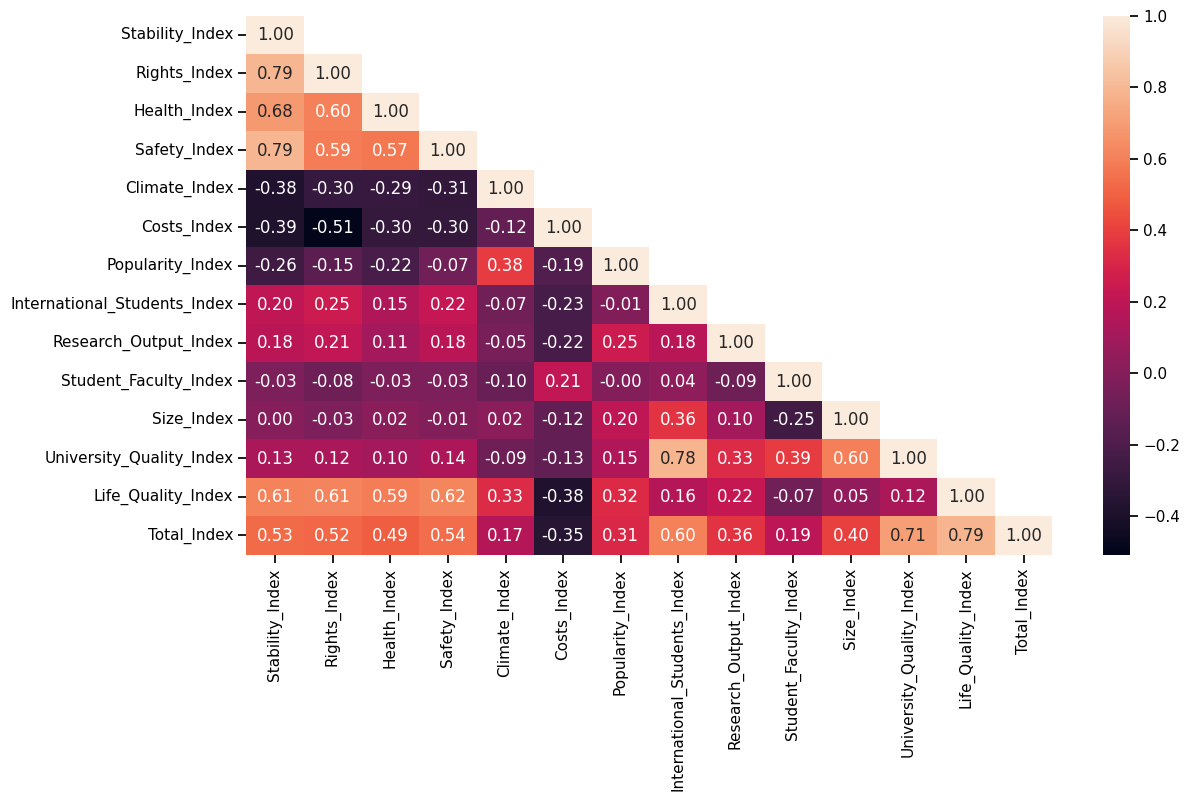

In [1891]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns

corr = uni.loc[:,uni.columns.str.contains('Index')].corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))

# Mask to see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels())
roty = a.set_yticklabels(a.get_yticklabels())

In [1892]:
uni.loc[0:6,["University", "Country", "Rank","Total_Index", "Score"]]

,University,Country,Rank,Total_Index,Score
0,Monash University,Australia,1.0,80.0,72.0
1,The University of Sydney,Australia,2.0,79.0,80.0
2,The University of Queensland,Australia,3.0,78.0,77.0
3,The University of New South Wales (UNSW Sydney),Australia,4.0,77.0,78.0
4,University of Toronto,Canada,5.0,76.0,85.0
5,New York University (NYU),US,6.0,74.0,79.0
6,RMIT University,Australia,7.0,72.0,43.0


In [1893]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

trace1 = go.Scatter(
                    x = uni['Total_Index'],
                    y = uni['Score'],
                    mode = "markers",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= uni.University)

layout = dict(title = 'QS Score vs Total Index',
              xaxis= dict(title= 'Total Index',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'QS Score',ticklen= 5,zeroline= False)
             )
fig = go.Figure(data = trace1, layout = layout, )
iplot(fig)

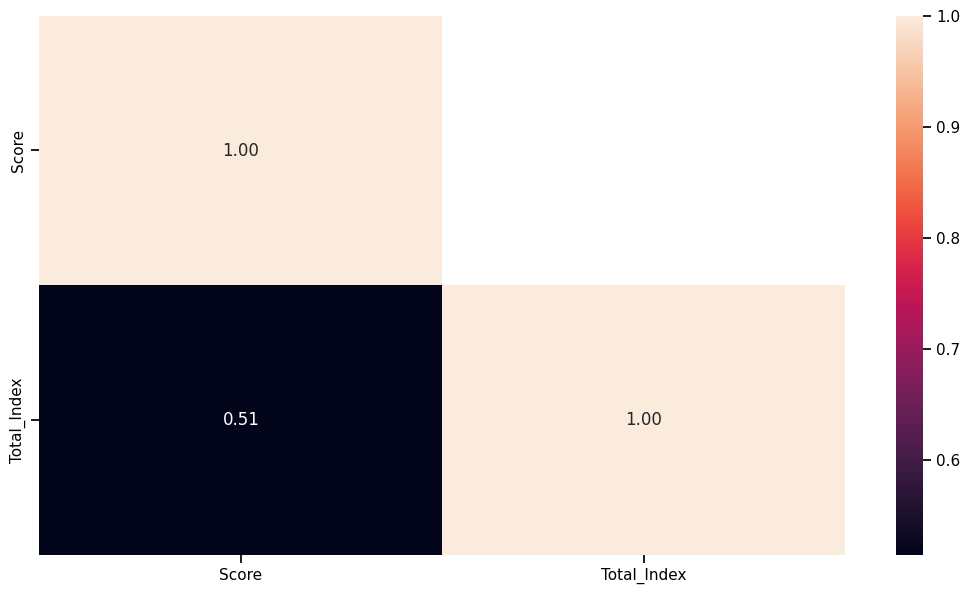

In [1894]:
# Correlation with heat map

corr = uni.loc[:,['Score', 'Total_Index']].corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))

# Mask to see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels())
roty = a.set_yticklabels(a.get_yticklabels())

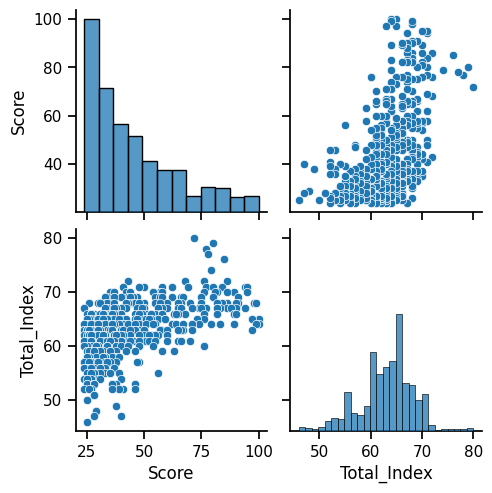

In [1895]:
sns.pairplot(uni.loc[:,['Score', 'Total_Index']])

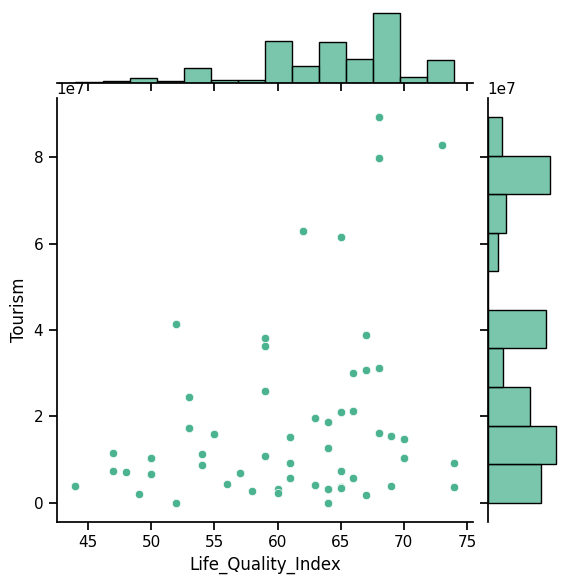

In [1896]:
sns.jointplot(x = uni['Life_Quality_Index'],
        y = uni['Tourism'],
        color = '#4Cb391');